## Problem statement

Predict the pawpularity score of pet images.

## About the dataset 

* The dataset contains pictures of stray dogs and animals looking for shelter and a happy home.
* A cute, lovely picture of a dog could help him/her find new pet parents.
* The Pawpularity score is '❤️Cuteness💕' score of an image. 
* The Id corresponds to image id of the pet.

## Goal of this competion

* Help company PetFinder.my in updating their "Image cuteness" calculation algorithms.
* Find and analyze the data to find features, important in finding the 'Pawpularity Score'

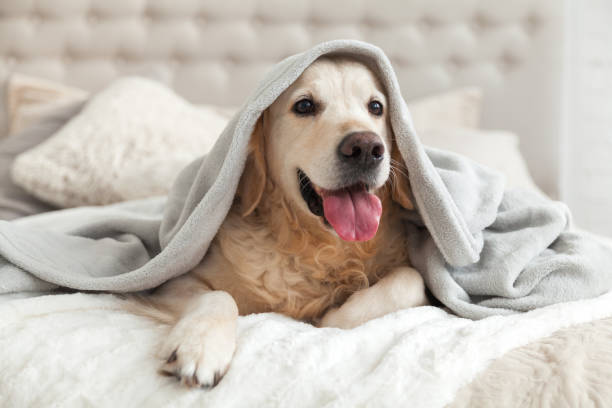

In [ ]:
### Import Libraries

import numpy as np 
import pandas as pd 
import os
from numpy import mean
!pip install flaml
import flaml
from flaml import AutoML
import warnings
warnings.filterwarnings('ignore')

## Load the train and test files

In [ ]:


train_path = '/kaggle/input/petfinder-pawpularity-score/train'
test_path = '/kaggle/input/petfinder-pawpularity-score/test'

df_train = pd.read_csv(train_path+'.csv')
df_test = pd.read_csv(test_path+'.csv')


## Finding Pawpularity scores

In [ ]:
# Take the train set columns as features

feature_cols=list(df_train.columns)[1:13]

# Values of train and test dataframes

train_set = np.array(df_train[feature_cols])
test_set = np.array(df_test[feature_cols])


## bin the pawpularity score among a list of values ranging from 0 to 100
### Labels is a list of pawpularity score values ranging from 1 to 10

df_train['label'] = pd.cut(np.array(df_train['Pawpularity']),
                          bins = list(range(0,110,10)),
                          labels = list(range(0,10)))


## Calculate the average pawpularity score of pets 
## The pet score can be between 1 to 10

paw_values = []
for i in range(0,10):
    v = list(df_train[df_train['label'] == i]['Pawpularity'])
    paw_values.append(mean(v))
ytrain = np.array(df_train['label'])

## FLAML 

FLAML is a python package that can tell us the best-fit machine learning model for low computation. Thus, it removes the burden of the manual process of choosing the best model and best parameter. 

To solve this problem, Microsoft built an AutoML system which is mainly focused on:

Model selection
Hyperparameter tuning
Feature engineering
Neural architecture search
Model compression 
This is an ongoing project for model selection, feature engineering, and hyperparameter tuning. Microsoft has built the Microsoft FLAML library package using python development. In the next section, we will start with the basics of Microsoft FLAML(a fast and lightweight autoML library. 

Ref: [Guide to FLAML](https://analyticsindiamag.com/guide-to-microsofts-flaml/)

## AutoML in Action 😎🎶🎶💁

In [ ]:
import flaml
from flaml import AutoML
import warnings
warnings.filterwarnings('ignore')

a = AutoML()
settings = {
    'estimator_list':['xgboost','rf','lgbm','catboost'],
    'log_file_name':'pp.log',
    'task':'classification',
    'metric':'accuracy',
    'time_budget':360,
    'seed':2021
}
a.fit(train_set, ytrain,**settings)

In [ ]:
## Predicted output

pred = a.predict(test_set)

## Iterate through the paw values list and 
## update the final predicted pawpularity scores
pred_set = [paw_values[i] for i in pred]

## Convert the 
pred_df = pd.DataFrame.from_dict({
    "Id":list(df_test["Id"]),
    "Pawpularity":pred_set
})
pred_df.to_csv('./submission.csv',index=False)
pred_df.head(5)

In [ ]:
# Convert submission file to .csv and download the submission file

pred_df.to_csv('/kaggle/working/submission.csv')

from IPython.display import FileLink
FileLink(r'submission.csv')